<a href="https://colab.research.google.com/github/TaoFeng1234/Tao_Portfolio/blob/master/CompraisonofClassifers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparison of classifers models 

Consider the following classification models:

(1) Decision Tree

(2) Random Forest

(3) AdaBoost

(4) Logistic Regression

(5) Linear Discriminant Analysis

(6) Naive Bayes

(7) Neural Network

(8) Gaussian Processes1

(9) Support vector machine

We will compare the performance of above models on a given binary classification task.

Consider the synthetic dataset generated by the following python script:

In [1]:
# The code in this cell is developed by Professor Willett and her team at the Univerisity of Chicago.

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.gaussian_process import GaussianProcessClassifier
import time
def create_dataset ():
  X ,y = make_classification (n_samples =1250 ,n_features =2 ,n_redundant =0 ,
                              n_informative =2, random_state =1,
                              n_clusters_per_class =1)
  rng = np.random.RandomState(2)
  X += 3* rng.uniform(size = X.shape)
  linearly_separable = (X ,y)
  X = StandardScaler().fit_transform(X)
  return X , y

X , y = create_dataset ()

Randomly split the dataset into training set Xtrain and test set Xtest, with 80% for
training and 20% for testing. Plot the decision boundaries of each of the classifiers on
the test set.


In [11]:
# The code in this cell is developed by Professor Willett and her team at the Univerisity of Chicago.

# General math and plotting modules.
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import time

# basic sklearn library 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

# You may use existing machine learning libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier

#split dataset into test set, train set and unlabel pool 
def split(X, y, train_size, test_size): 
    X_train, X_pool, y_train, y_pool = train_test_split( 
        X, y, train_size = train_size, random_state=42) 
    unlabel, X_test, label, y_test = train_test_split( 
        X_pool, y_pool, test_size = test_size, random_state=42) 
    return X_train, y_train, X_test, y_test, unlabel, label 

def create_dataset():
    X, y = make_classification(n_samples=1250,
                               n_features=2, 
                               n_redundant=0, 
                               n_informative=2,
                               random_state=1, 
                               n_clusters_per_class=1)

    rng = np.random.RandomState(2)
    X += 3*rng.uniform(size=X.shape)
    linearly_separable = (X, y)

    X = StandardScaler().fit_transform(X)
    
    return X,y

X,y = create_dataset()

num_samples = X.shape[0]
print(num_samples)
incremental_train_size = 100
init_train_ratio = 0.04
test_ratio = 0.20/(1-init_train_ratio)

X_INIT, Y_INIT, X_TEST, Y_TEST, X_UNLABELED, Y_UNLABELED = split( 
            X,y, init_train_ratio, test_ratio) 

print(Y_UNLABELED.shape)
# Compare performance of different classifiers on the above dataset.


1250
(950,)


Reference:
Classier Comparison - 
https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py

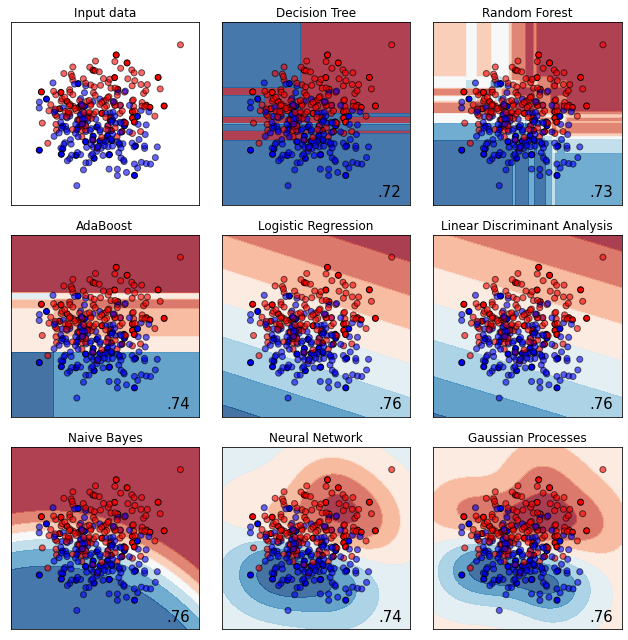

In [10]:
  import matplotlib.pyplot as plt
  from matplotlib.colors import ListedColormap
  # You may use existing machine learning libraries
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.ensemble import RandomForestClassifier
  from sklearn.ensemble import AdaBoostClassifier
  from sklearn.linear_model import LogisticRegression
  from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
  from sklearn.naive_bayes import GaussianNB
  from sklearn.neural_network import MLPClassifier
  from sklearn.gaussian_process import GaussianProcessClassifier
  from sklearn.svm import SVC

  X_train, y_train, X_test, y_test = X_INIT, Y_INIT, X_TEST, Y_TEST


  h = .02  # step size in the mesh

  names = ["Decision Tree","Random Forest","AdaBoost","Logistic Regression",
          "Linear Discriminant Analysis","Naive Bayes", "Neural Network",
          "Gaussian Processes","Support vector machine"]

  classifiers = [DecisionTreeClassifier(),
                RandomForestClassifier(n_estimators=10),
                AdaBoostClassifier(n_estimators=10), 
                LogisticRegression(),LinearDiscriminantAnalysis(),
                GaussianNB(), GaussianProcessClassifier(random_state=0), SVC()]

  figure = plt.figure(figsize=(9, 9))
  i = 1


  # preprocess dataset, split into training and test part
  x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
  y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))

  # just plot the dataset first
  cm = plt.cm.RdBu
  cm_bright = ListedColormap(['#FF0000', '#0000FF'])
  ax = plt.subplot(3, (len(classifiers) + 1)/3, i)

  ax.set_title("Input data")
  # Plot the training points
  ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
              edgecolors='k')
  # Plot the testing points
  ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
              edgecolors='k')
  ax.set_xlim(xx.min(), xx.max())
  ax.set_ylim(yy.min(), yy.max())
  ax.set_xticks(())
  ax.set_yticks(())
  i += 1

  # iterate over classifiers
  for name, clf in zip(names, classifiers):
      ax = plt.subplot(3, (len(classifiers) + 1)/3, i)
      clf.fit(X_train, y_train)
      score = clf.score(X_test, y_test)

      # Plot the decision boundary. For that, we will assign a color to each
      # point in the mesh [x_min, x_max]x[y_min, y_max].
      if hasattr(clf, "decision_function"):
          Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
      else:
          Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

      # Put the result into a color plot
      Z = Z.reshape(xx.shape)
      ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

      # Plot the training points
      ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                  edgecolors='k')
      # Plot the testing points
      ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                  edgecolors='k', alpha=0.6)

      ax.set_xlim(xx.min(), xx.max())
      ax.set_ylim(yy.min(), yy.max())
      ax.set_xticks(())
      ax.set_yticks(())
   
      ax.set_title(name)
      ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
              size=15, horizontalalignment='right')
      i += 1

plt.tight_layout()
plt.show()

Now, test how the performance of each of the classifiers varies as the size
of the training set increasing . 

Starting from a (random)
subset of the training set Xtrain of size 50, train your classification model. Then,
increase your training set sizes to [50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], by randomly adding training examples from Xtrain (with replacement). 

Eventually, I select all the points in Xtrain. Repeat the experiment 10 times. For each classifier, plot its average accuracy at each sample size. Compare the accuracy of different algorithms in
a single figure, and I have the following findings:

The accuracy for each decision tree, random forest, and AdaBoost starts at a relatively low rate. The accuracy increases as the size of the training dataset increase. The accuracy for logistic regression, LDA, NB, Neural Network, SVM and Gaussion Processes strats high and did not chance much as the size of the training set increases. 


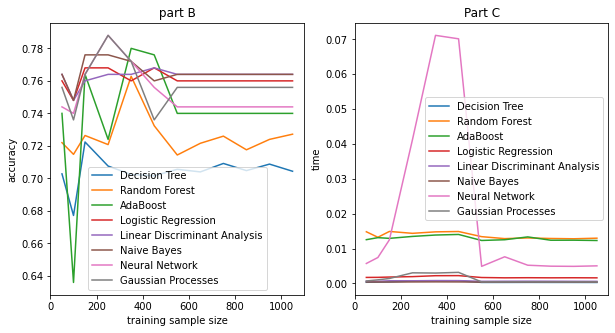

In [12]:
import random
nums =  [0, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

names = ["Decision Tree","Random Forest","AdaBoost","Logistic Regression",
          "Linear Discriminant Analysis","Naive Bayes", "Neural Network",
          "Gaussian Processes","Support vector machine"]

classifiers = [DecisionTreeClassifier(),RandomForestClassifier(n_estimators=10),
              AdaBoostClassifier(n_estimators=10), 
              LogisticRegression(),LinearDiscriminantAnalysis(),
              GaussianNB(), GaussianProcessClassifier(random_state=0), SVC()]

def avgacc(clf, X_train, y_train, X_test, y_test):
  lst = []
  timelst =[]
  for i in range(10):
    start = time.time()
    clf = clf.fit(X_train, y_train)
    stop = time.time()
    tiempo = stop-start
    timelst.append(tiempo)

    #accuracy for a certain training size and classifier
    test_acc = clf.score(X_test , y_test)
    lst.append(test_acc)
  av_acc = np.average(lst)
  time_avg = np.average(timelst)
  return av_acc, time_avg

def classlst(nums, names, classifiers):
  # returns the average accuracy of all classifiers 
  # iterate over classifiers
  classlst = []
  classtimelst = []
  for name, clf in zip(names, classifiers):
    avglst = []
    avgtimelst = []
    X_INIT, Y_INIT, X_TEST, Y_TEST, X_UNLABELED, Y_UNLABELED = split( 
          X,y, init_train_ratio, test_ratio) 
    
    xt = np.ndarray.tolist(X_INIT)
    yt =  np.ndarray.tolist(Y_INIT)
    X_test, y_test = X_TEST, Y_TEST
    xx = np.ndarray.tolist(X_UNLABELED)
    yy = np.ndarray.tolist(Y_UNLABELED)

    for num in nums:
      X_train = xt + xx[:num]
      y_train = yt + yy[:num] 
      del xx[:num]
      del yy[:num]

      X_train = np.asarray(X_train)
      y_train = np.asarray(y_train)

      #list of average accuracies at every train size
      avg , avgtime = avgacc(clf, X_train, y_train, X_test, y_test)
      avglst.append(avg)
      avgtimelst.append(avgtime)
    # list of [lists of accuracy at every train size] for every classifyer
    classlst.append(avglst)
    classtimelst.append(avgtimelst)

  
  lenlst = []
  for i in nums:
    lenght = len(X_train) + i
    lenlst.append(lenght)
  plt.figure(figsize=(10, 5))
  plt.subplot(121)
  plt.xlabel("training sample size")
  plt.ylabel("accuracy")
  plt.title(" part B ")
  for i in range(len(classlst)):    
      plt.plot(lenlst, classlst[i],label = names[i])
  plt.legend()
  plt.subplot(122)
  plt.xlabel("training sample size")
  plt.ylabel("time")
  plt.title("Part C")
  for i in range(len(classtimelst)):    
      plt.plot(lenlst, classtimelst[i],label = names[i])
  plt.legend()
  plt.show()

classlst(nums, names, classifiers)
